In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from data_util import *

import paperfig as pf

pf.set_fontscale(2.)

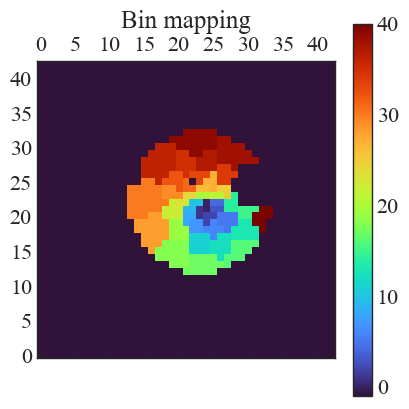

In [2]:
target_snr_per_bin = 23 # 23 and 28

velocity_dispersion_realizations = None
sample_number_for_each_setting = 1000

ranges = range(1, 4)
degs = range(2, 5)
templates = range(1, 4)
quasars = ['A', 'B', 'C']

directory = "../kcwi_extractions/extracted_dispersions/"

bin_mapping = load_bin_mapping(target_snr_per_bin=target_snr_per_bin,
                               plot=True
                              )

def plot_difference(ax, rng=1, deg=3, template=1, quasar='A',
                    target_snr_per_bin=23,
                    target_snr_per_bin_for_comparison=23,
                    divide_by_statistical=False):
    """

    """
    ## first case
    bin_mapping_0 = load_bin_mapping(target_snr_per_bin=target_snr_per_bin,
                                     plot=False)
    vd_name = 'VD_wave_rng_{}_deg_{}_global_temp_{}_quasar_sp_{}_SN_{}.txt'.format(
        1, 3, 1, 'A', target_snr_per_bin
    )

    url = directory + vd_name
    extracted_vel_dis_0 = np.loadtxt(url)
    kinematic_map_0 = get_kinematics_maps(extracted_vel_dis_0[:, 1],
                                          bin_mapping_0)
    uncertainty_map_0 = get_kinematics_maps(extracted_vel_dis_0[:, 3],
                                            bin_mapping_0)


    ## second case
    bin_mapping = load_bin_mapping(target_snr_per_bin=target_snr_per_bin_for_comparison,
                                   plot=False)
    vd_name = 'VD_wave_rng_{}_deg_{}_global_temp_{}_quasar_sp_{}_SN_{}.txt'.format(
        rng, deg, template, quasar, target_snr_per_bin_for_comparison
    )

    url = directory + vd_name
    extracted_vel_dis = np.loadtxt(url)
    kinematic_map = get_kinematics_maps(extracted_vel_dis[:, 1], bin_mapping)
    uncertainty_map = get_kinematics_maps(extracted_vel_dis[:, 3], bin_mapping)

    diff = kinematic_map - kinematic_map_0

    if divide_by_statistical:
        diff /= np.sqrt(uncertainty_map_0**2) # + uncertainty_map**2)
        vmax, vmin = 3, -3
    else:
        vmax, vmin = 30, -30

    diff[kinematic_map == 0] = np.nan

    im = ax.matshow(diff[11:34, 12:35], cmap='RdBu_r', origin='lower',
                    vmax=vmax, vmin=vmin)
    # make colorbar the right size
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax) #, label=')

    ax.set_xticks([])
    ax.set_yticks([])

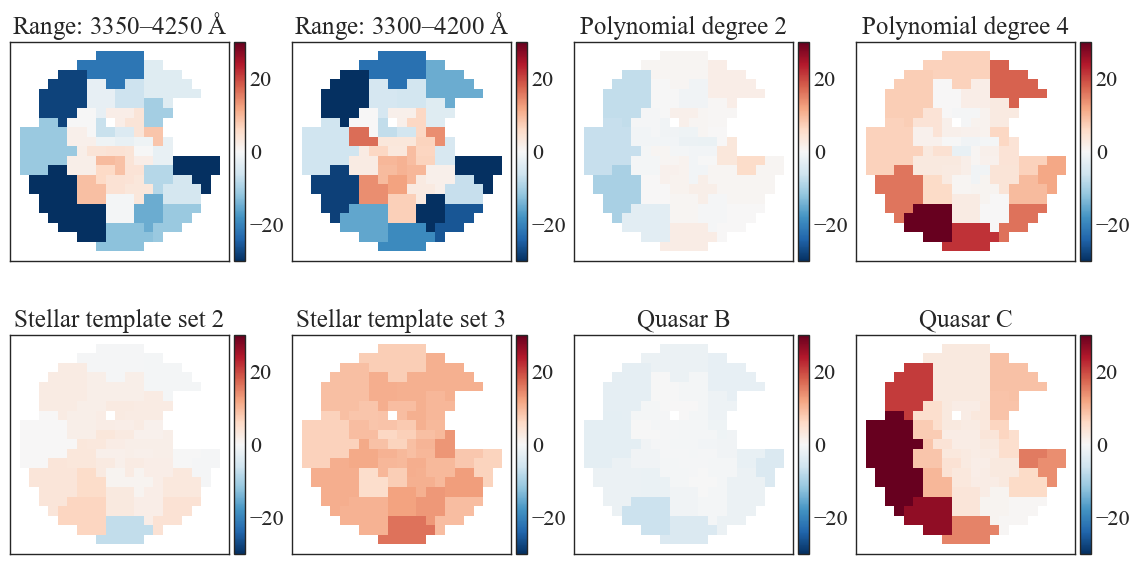

In [3]:
# Make a plot with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=pf.get_fig_size(width=pf
                                                       .mnras_textwidth*2, height_ratio=0.5))

# ranges
plot_difference(axes[0, 0], rng=2)
plot_difference(axes[0, 1], rng=3)
axes[0, 0].set_title(r'Range: 3350–4250 $\rm\AA$')
axes[0, 1].set_title(r'Range: 3300–4200 $\rm\AA$')

# degs
plot_difference(axes[0, 2], deg=2)
plot_difference(axes[0, 3], deg=4)
axes[0, 2].set_title(r'Polynomial degree 2')
axes[0, 3].set_title(r'Polynomial degree 4')

# templates
plot_difference(axes[1, 0], template=2)
plot_difference(axes[1, 1], template=3)
axes[1, 0].set_title(r'Stellar template set 2')
axes[1, 1].set_title(r'Stellar template set 3')

# quasars
plot_difference(axes[1, 2], quasar='B')
plot_difference(axes[1, 3], quasar='C')
axes[1, 2].set_title(r'Quasar B')
axes[1, 3].set_title(r'Quasar C')

fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/absolute_systematic.pdf',
            bbox_inches='tight')

/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_41633/214108331.py:54: RuntimeWarning: invalid value encountered in true_divide
  diff /= np.sqrt(uncertainty_map_0**2) # + uncertainty_map**2)


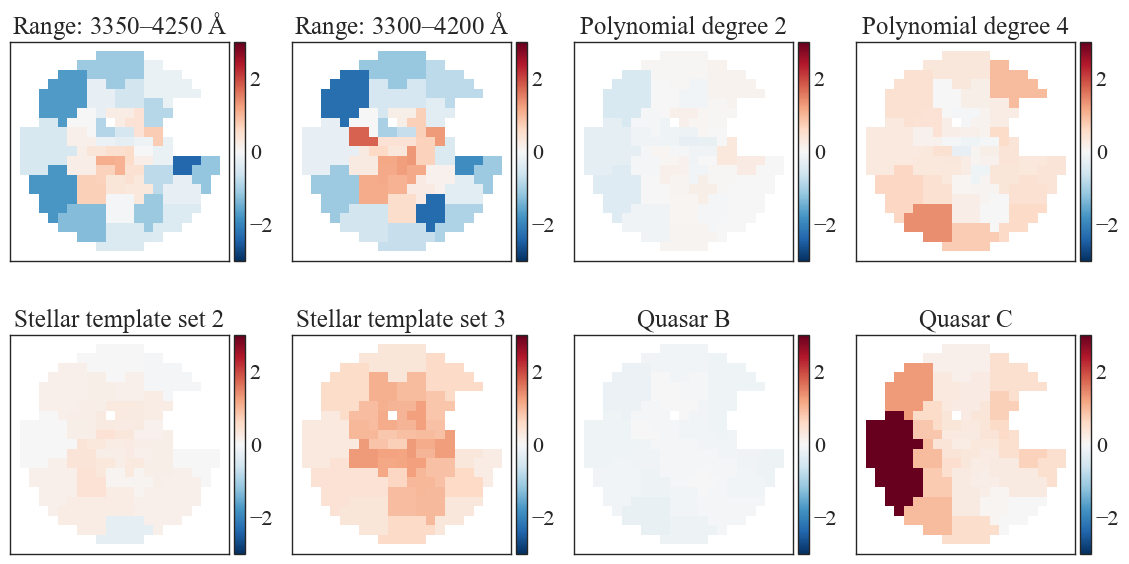

In [4]:
# Make a plot with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=pf.get_fig_size(width=pf
                                                       .mnras_textwidth*2, height_ratio=0.5))

# ranges
plot_difference(axes[0, 0], rng=2, divide_by_statistical=True)
plot_difference(axes[0, 1], rng=3, divide_by_statistical=True)
axes[0, 0].set_title(r'Range: 3350–4250 $\rm\AA$')
axes[0, 1].set_title(r'Range: 3300–4200 $\rm\AA$')

# degs
plot_difference(axes[0, 2], deg=2, divide_by_statistical=True)
plot_difference(axes[0, 3], deg=4, divide_by_statistical=True)
axes[0, 2].set_title(r'Polynomial degree 2')
axes[0, 3].set_title(r'Polynomial degree 4')

# templates
plot_difference(axes[1, 0], template=2, divide_by_statistical=True)
plot_difference(axes[1, 1], template=3, divide_by_statistical=True)
axes[1, 0].set_title(r'Stellar template set 2')
axes[1, 1].set_title(r'Stellar template set 3')

# quasars
plot_difference(axes[1, 2], quasar='B', divide_by_statistical=True)
plot_difference(axes[1, 3], quasar='C', divide_by_statistical=True)
axes[1, 2].set_title(r'Quasar B')
axes[1, 3].set_title(r'Quasar C')

fig.savefig(
    '/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/normalized_systematic.pdf',
    bbox_inches='tight')


/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_41633/214108331.py:54: RuntimeWarning: invalid value encountered in true_divide
  diff /= np.sqrt(uncertainty_map_0**2) # + uncertainty_map**2)


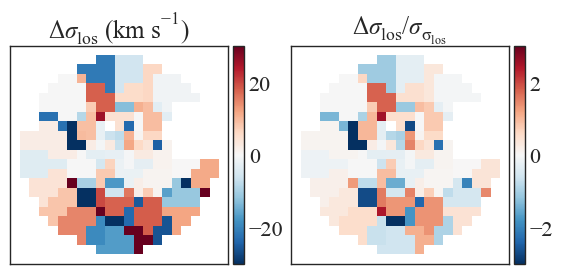

In [6]:
# make subplot with 1 row 2 columns
fig, axes = plt.subplots(1, 2, figsize=pf.get_fig_size(width=pf.mnras_colwidth*2,
                                                       height_ratio=0.5))

plot_difference(axes[0], target_snr_per_bin_for_comparison=28)
plot_difference(axes[1], target_snr_per_bin_for_comparison=28, divide_by_statistical=True)
axes[0].set_title(r'$\Delta \sigma_{\rm los}$ (km s$^{-1}$)')
axes[1].set_title(r'$\Delta \sigma_{\rm los} / \sigma_{\rm \sigma_{\rm '
                  r'los}}$');

fig.savefig(
    '/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/binning_systematic.pdf',
    bbox_inches='tight')
